[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dancsomarci/Self-Driving-in-Duckietown/blob/Environment-setup/Visualization.ipynb)

In [1]:
# Importing dependencies
from matplotlib import pyplot as plt
import pickle
import os

In [2]:
%matplotlib inline 

In [3]:
raw_data_path = "C:\\Users\\nyist\\SavedData\\"
raw_images = []
processed_images = []
labels = []

# Reading saved raw data into [labels, raw_images]
for filename in os.listdir(raw_data_path):
    file = open(os.path.join(raw_data_path, filename), "rb")
    for frame in pickle.load(file):
        label, image = frame
        raw_images.append(image)
        labels.append(label)

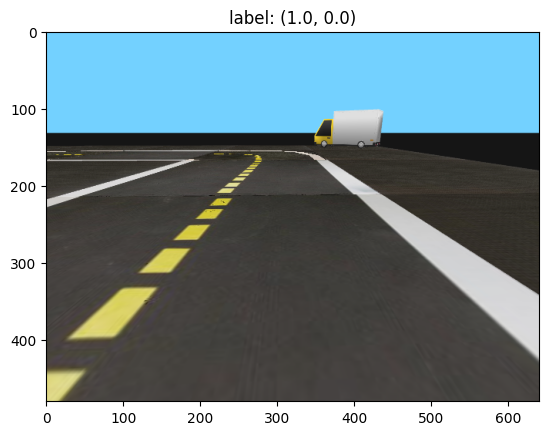

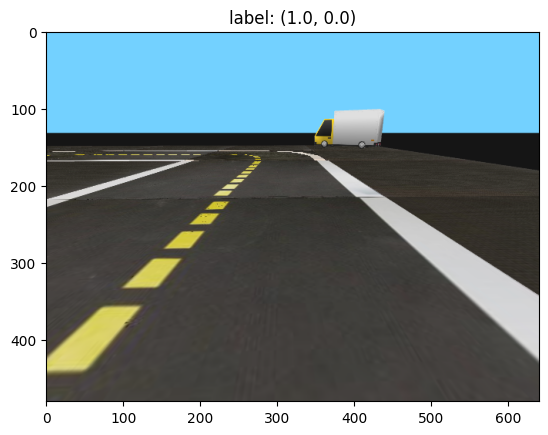

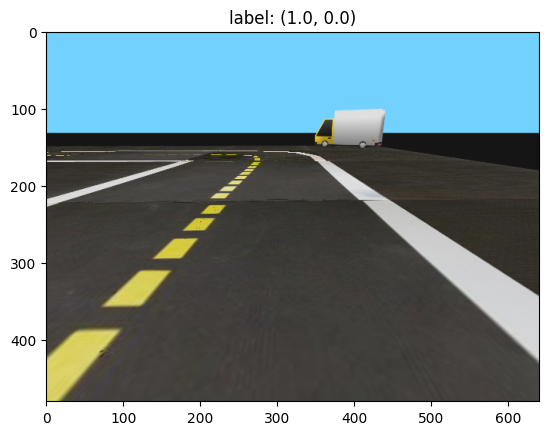

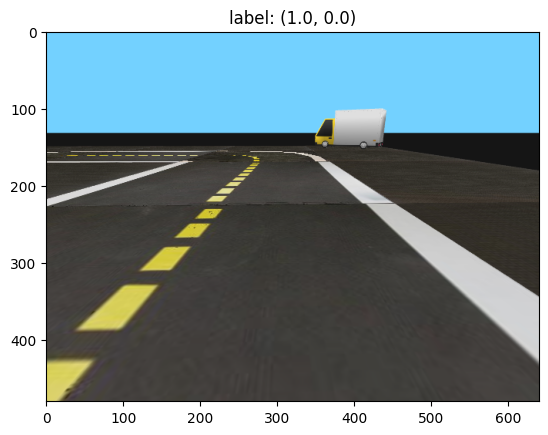

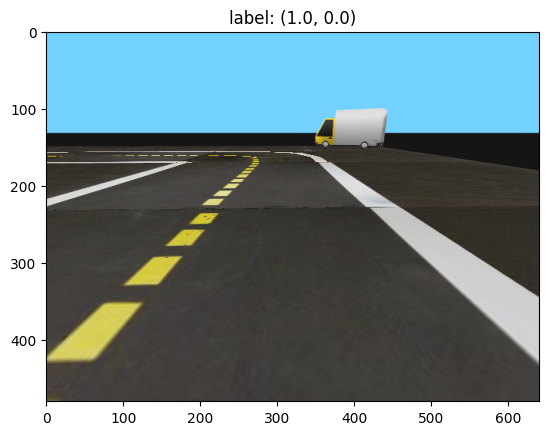

In [4]:
# Displaying raw data
for i in range(80, 85):
    plt.imshow(raw_images[i])
    plt.title("label: " + str(labels[i]))
    plt.show()

In [5]:
processed_data_path = "C:\\Users\\nyist\\ProcessedData\\"
processed_images = []

# Reading saved processed data into processed_images
for filename in os.listdir(processed_data_path):
    file = open(os.path.join(processed_data_path, filename), "rb")
    for frame in pickle.load(file):
        _, image = frame
        processed_images.append(image)

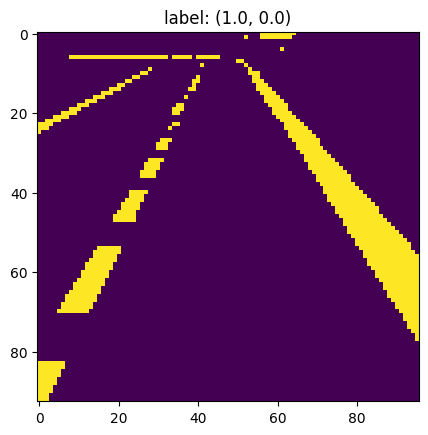

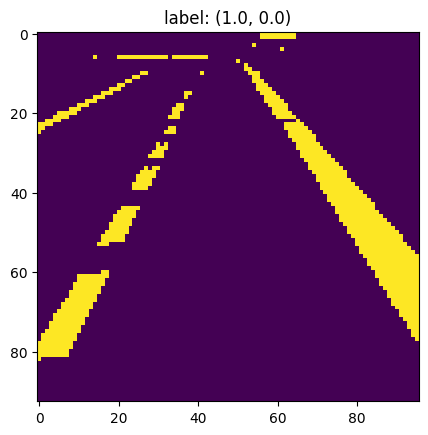

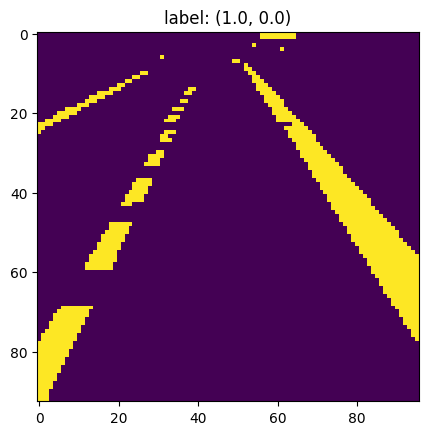

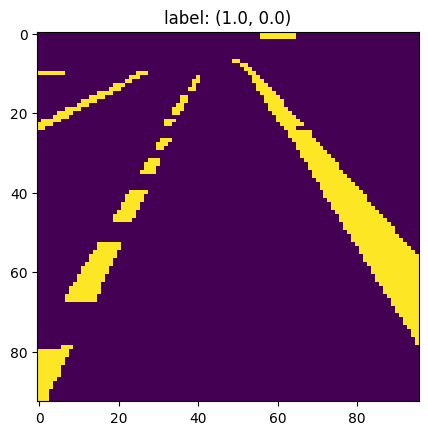

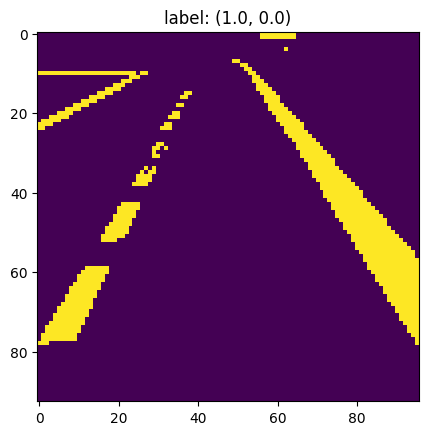

In [6]:
# Displaying processed data
for i in range(80, 85):
    plt.imshow(processed_images[i])
    plt.title("label: " + str(labels[i]))
    plt.show()

In [7]:
split_data_path = "C:\\Users\\nyist\\splitData\\"
split = {"testing_data" : 0, "training_data" : 0, "validation_data" : 0}

# Reading saved processed data into split_data_path
for filename in os.listdir(split_data_path):
    file = open(os.path.join(split_data_path, filename), "rb")
    for frame in pickle.load(file):
        split[filename] += 1

print("training data count: " + str(split["training_data"]))
print("testing data count: " + str(split["testing_data"]))
print("validation data count: " + str(split["validation_data"]))

training data count: 28811
testing data count: 3513
validation data count: 3572
